# Model 0: Baseline Model with Stemming + Logistic Regression

Set up a basic pipeline using manual text preprocessing and Logistic Regression.

## 🔧 Steps:
1. Import Librairies and load data (Assign columns name)

2. Preprocessing:

    - Remove punctuation and digits

    - Tokenize

    - Remove stopwords

    - Stemming (using NLTK’s PorterStemmer)

    - Join tokens back into a string

3. Vectorization:

    - CountVectorizer (Bag-of-Words)

4. Model:

    - LogisticRegression

5. Evaluation:

    - Accuracy, confusion matrix, classification report

##  ✅ Purpose:
Establish a working pipeline and baseline score (~70-80% accuracy is expected here).

## 1. Import Librairies and load data

In [12]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv("data/training_data_lowercase.csv", sep="\t", header=None, names=["label", "title"])
data.reset_index(drop=True, inplace=True)  # optional

data.head()

,label,title
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


## 2. Preprocessing:

In [7]:
# Preprocessing function
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer() # Stemming

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

data["clean_title"] = data["title"].apply(preprocess_text)

## 3. Train split and Vectorization:

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data["clean_title"], data["label"], test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## 4. Logistic Regression Model:

In [9]:
# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

## 5. Evaluation:

In [11]:
# Evaluation
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9338310642658468
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3529
           1       0.92      0.94      0.93      3302

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



## 6. Confusion Matrix Plot:

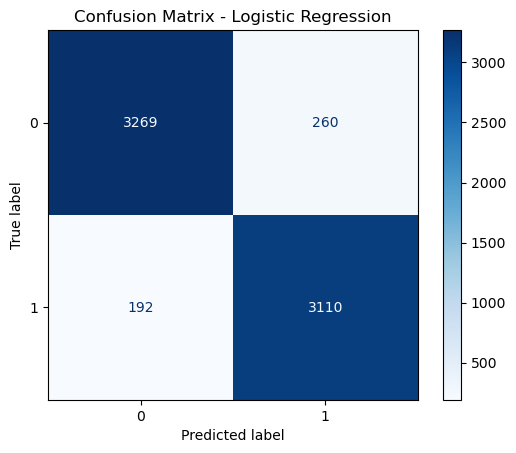

In [13]:
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
